<a href="https://colab.research.google.com/github/hananedjellouadji/GMC_AI/blob/main/PROJECT_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

Here we will predict the quality of wine on the basis of giving features 

 We use the wine quality dataset. This dataset has the fundamental features (different components and chemical parameters) which are responsible for affecting the quality. By the use of several Machine learning models and the classification techniques to check further the quality of the wine i.e. is it good or bad.

 
 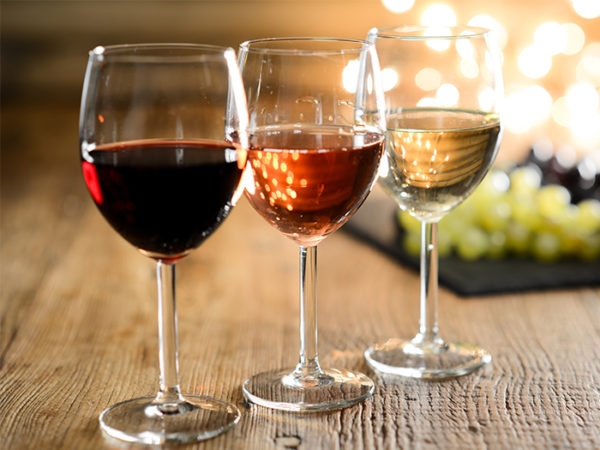

# Importing, describing

Importing the necessary libraries and functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import normalize

In [ ]:
ds=pd.read_csv('wine_quality_data.csv', sep=';') #loading dataset from csv file
print("Rows, columns: " + str(ds.shape)) #showing number of columns and rows
ds.head() #showing the first 5 rows

Rows, columns: (606, 12)


,fixed acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,bad


 Here's the explanation of the different inputs of our dataset :
*   fixed acidity : is the amount of the most acids involved with wine or nonvolatile (do not evaporate readily)
*   volatile_acidity is a measure of the wine's volatile (or gaseous) acids.
*   citric_acid : is a weak organic acid, which is often used as a natural preservative or additive to food or drink to add a sour taste.
*   residual_sugar: is the sugar that remains in a wine after fermentation completes.
*   chlorides: are the amount of salt in the wine
*   free sulfur dioxide :the free form of SO2, it prevents microbial growth and the oxidation of wine.
*   total sulfur dioxide : amount of free and bound forms of S02, in low amounts it's mostly undetectable in wine, but over 50ppm ;it becomes evident in the nose and taste of wine
*   density : the density of water is close to that of water depending on the percent alcohol and sugar content
*   pH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
*   sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
*   alcohol :the percent alcohol content of the wine
*   quality: output variable based on sensory data to tell if a wine is of good or bad quality

# Data preprocessing :

In [ ]:
ds['quality']=ds["quality"].map({'good':1,'bad':0}) #encoding the categorical to numerical
ds.fillna(ds.mode(),inplace=True) #filling the gaps with the most repeated value (most used dosage)
ds

,fixed acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
601,7.3,0.51,0.18,2.1,0.070,12.0,28,0.99768,3.52,0.73,9.5,1
602,8.2,0.34,0.38,2.5,0.080,12.0,57,0.99780,3.30,0.47,9.0,1
603,8.6,0.33,0.40,2.6,0.083,16.0,68,0.99782,3.30,0.48,9.4,0
604,7.2,0.50,0.18,2.1,0.071,12.0,31,0.99761,3.52,0.72,9.6,1


In [ ]:
ds.isnull().sum() #checking if there's any missing data

fixed acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

no missing data found

In [ ]:
ds.describe() #let's see the average amounts of our ingredients

,fixed acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,606.000000,606.000000,606.000000,606.00000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,8.918812,0.522723,0.324373,2.62995,0.093391,15.088284,50.691419,0.997607,3.282640,0.693779,10.153795,0.455446
std,1.991580,0.173580,0.210780,1.34854,0.056261,10.048768,33.825642,0.001775,0.157345,0.201502,1.015570,0.498422
min,4.600000,0.180000,0.000000,1.20000,0.039000,1.000000,8.000000,0.991200,2.740000,0.330000,8.400000,0.000000
25%,7.500000,0.390000,0.150000,1.90000,0.073000,7.000000,24.000000,0.996563,3.170000,0.570000,9.400000,0.000000
50%,8.400000,0.520000,0.310000,2.30000,0.083000,12.000000,42.000000,0.997400,3.280000,0.640000,9.800000,0.000000
75%,10.300000,0.630000,0.490000,2.70000,0.094000,20.000000,65.000000,0.998700,3.377500,0.770000,10.600000,1.000000
max,15.600000,1.330000,1.000000,15.50000,0.611000,68.000000,165.000000,1.003200,3.900000,2.000000,14.000000,1.000000


# Data Visualization :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89d6701ed0>,
      dtype=object)

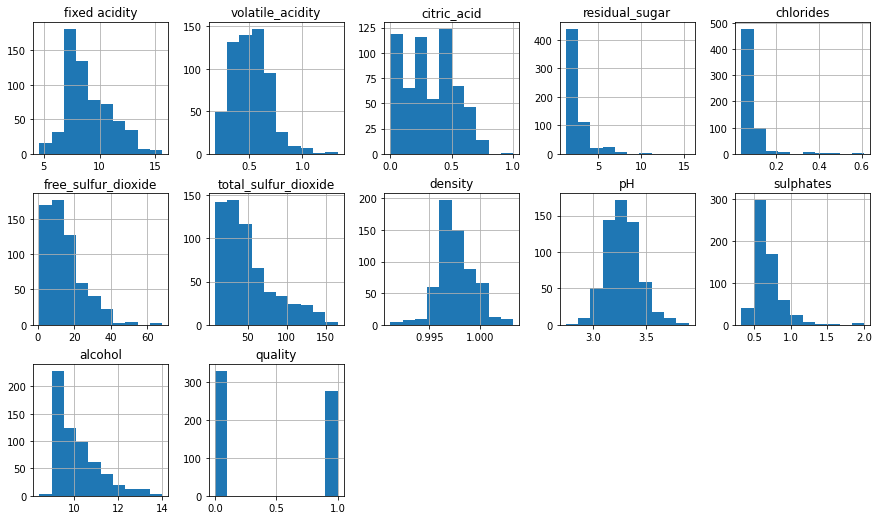

In [ ]:
ds.hist(figsize=(15,15),layout=(5,5))

the mean value of pH is : 3.28, wines contain lot of acid..

the mean value of quality is : 0.455 , there a bit more of bad quality wines than the ones of good quality

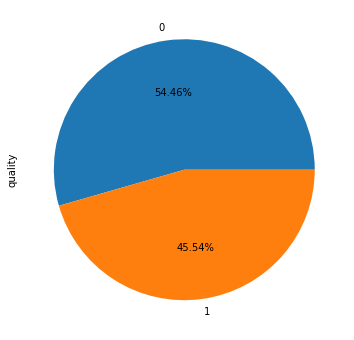

In [ ]:
plt.figure(figsize=(7,6))
ds['quality'].value_counts().plot.pie(autopct="%2.2f%%") #pourcentages of good/bad quality wines
#(confirms the previous remark)

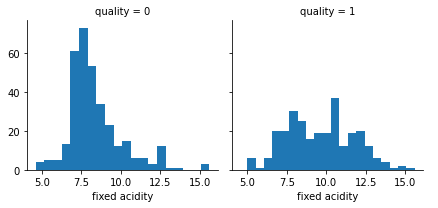

In [ ]:
g=sns.FacetGrid(ds,col='quality')
g.map(plt.hist,'fixed acidity', bins=20)
g.add_legend() #we want to check the influence of the fixed acidity on the quality of the wine

and we can see that the quality decreases for barely the same dosages of fixed acidity

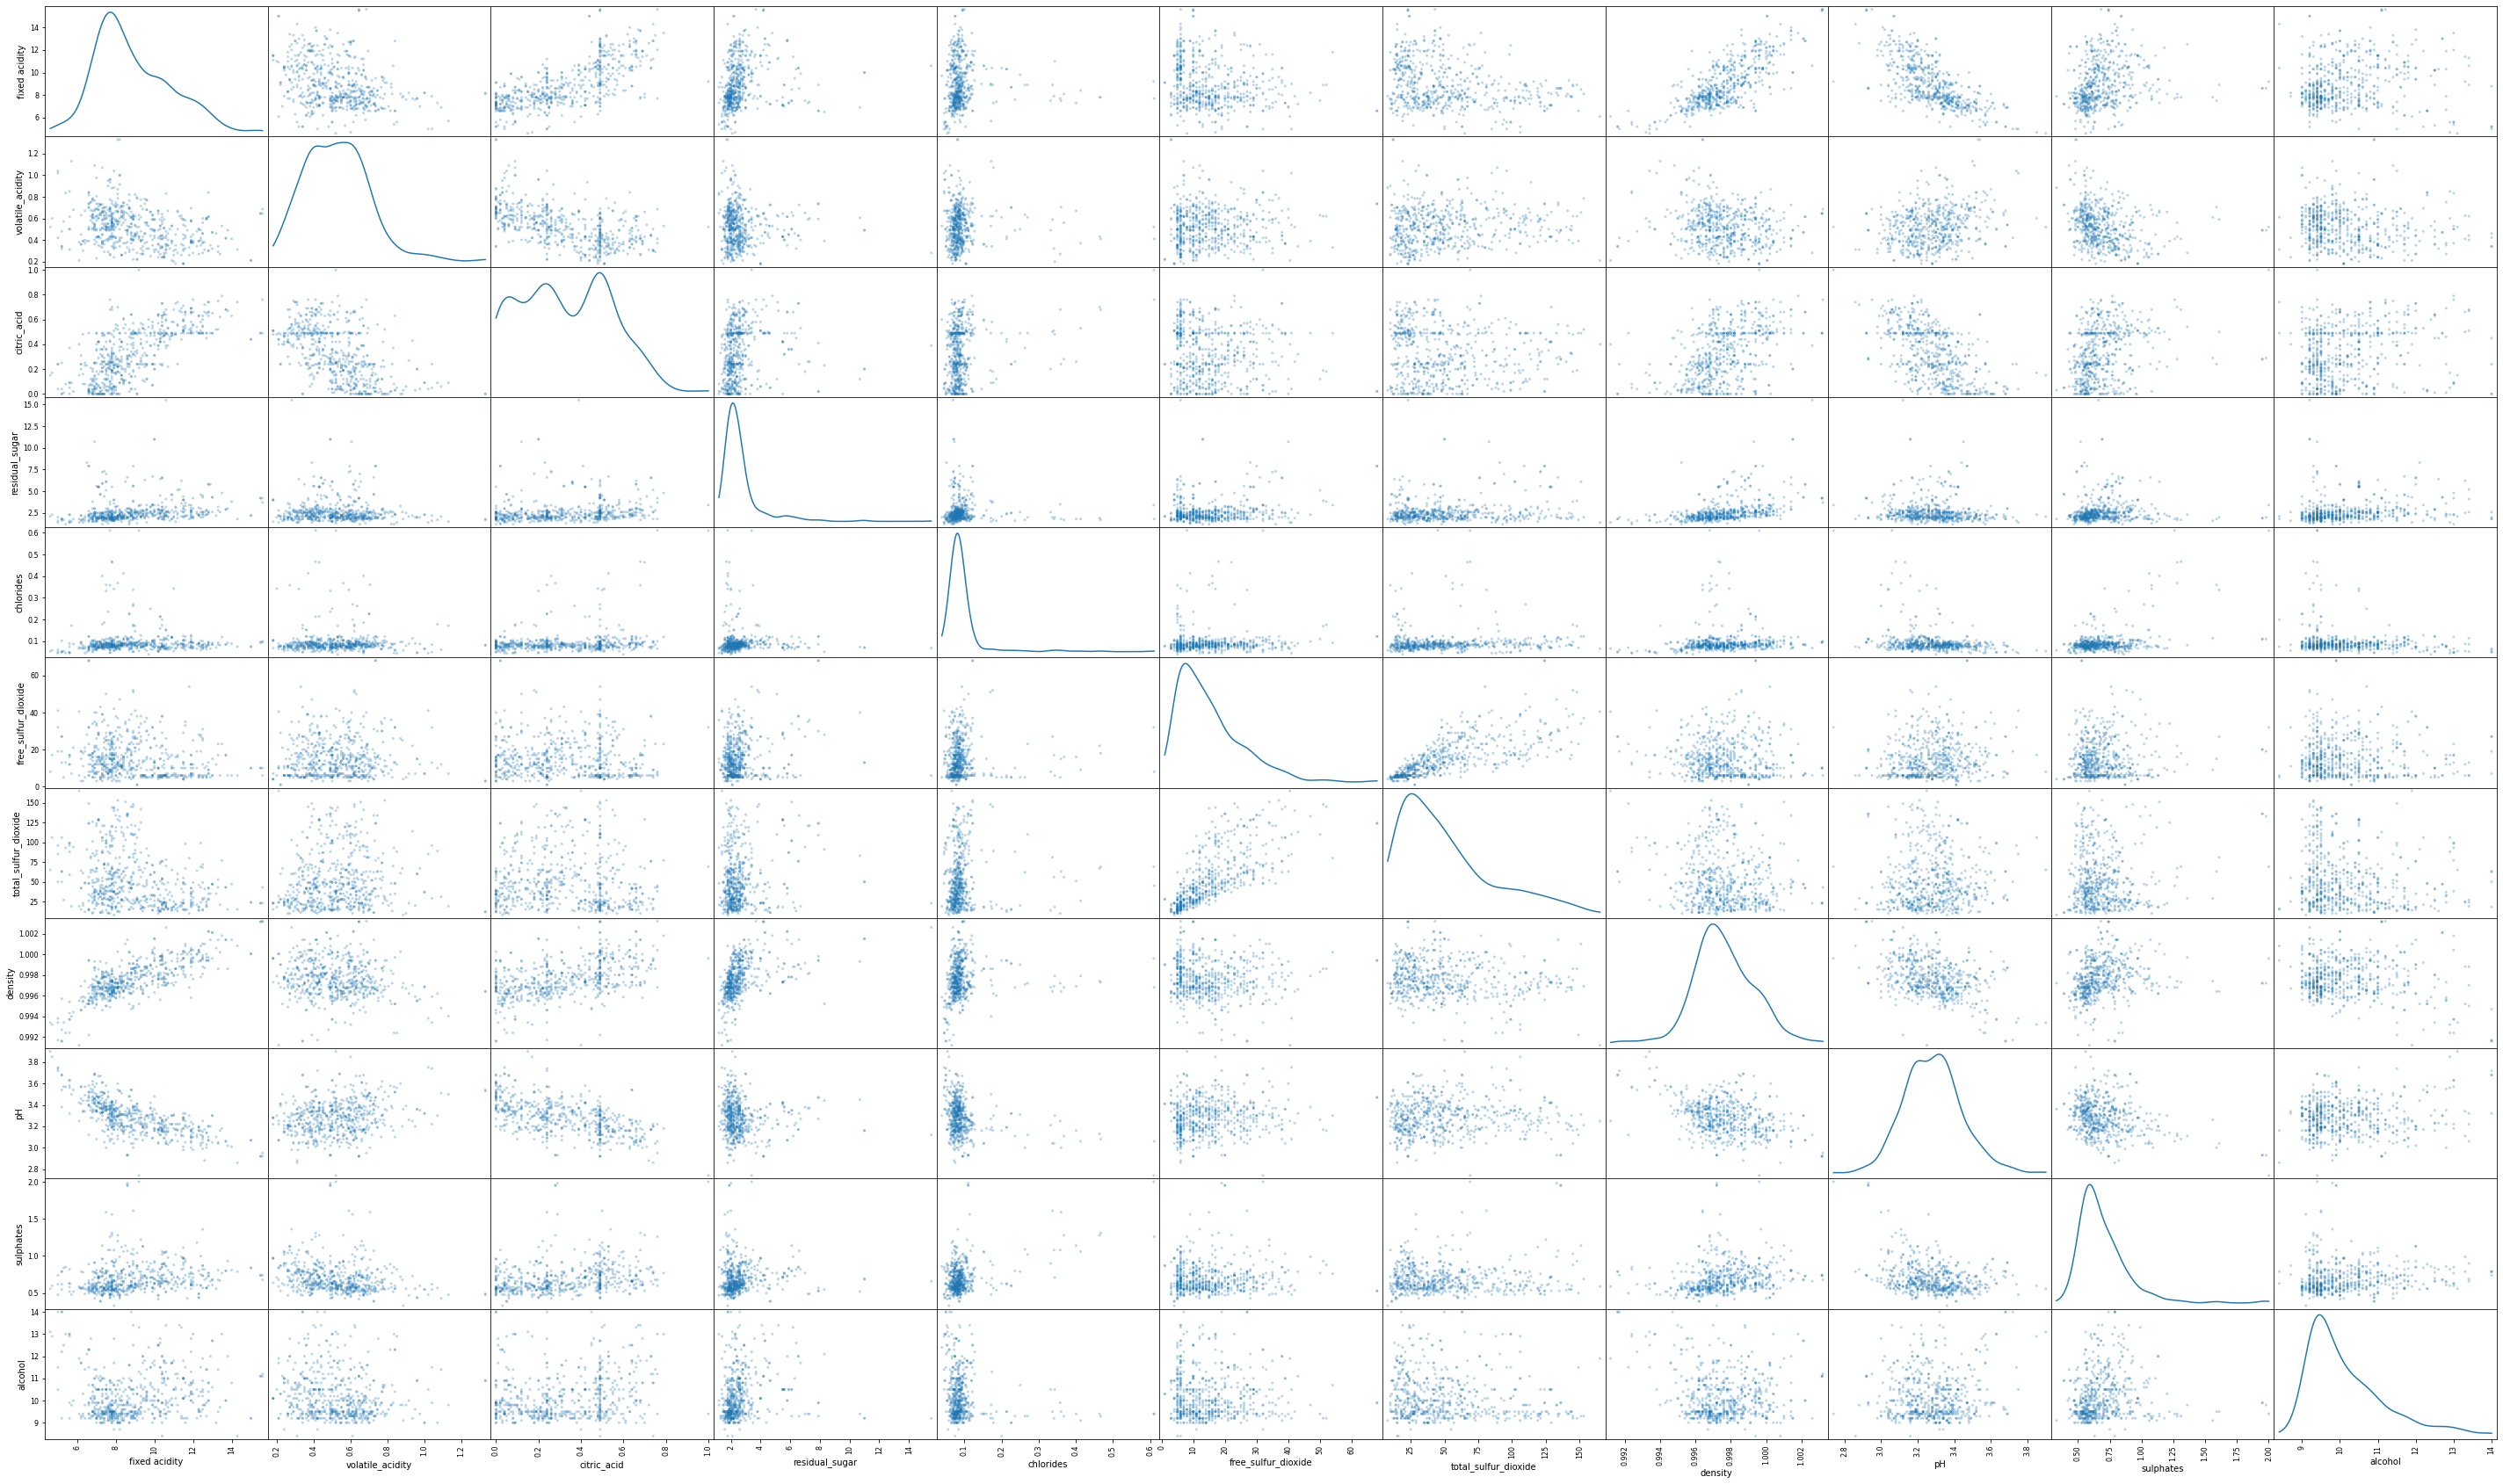

In [ ]:
pd.plotting.scatter_matrix(ds, alpha = 0.3, figsize = (50,30), diagonal = 'kde'); #here we plot all the data (everything in function of everything)

example of ghraphs' interpretation:

Fixed acidity has positive correlation with citric acid and density:
from the plot above the quality of wine decreases with fixed acidity, then same will be the effect of Citric Acid and Density;
 
fixed acidity has negative correlation with volatile acidity and pH 
so the quality increases with pH and volatile acidity

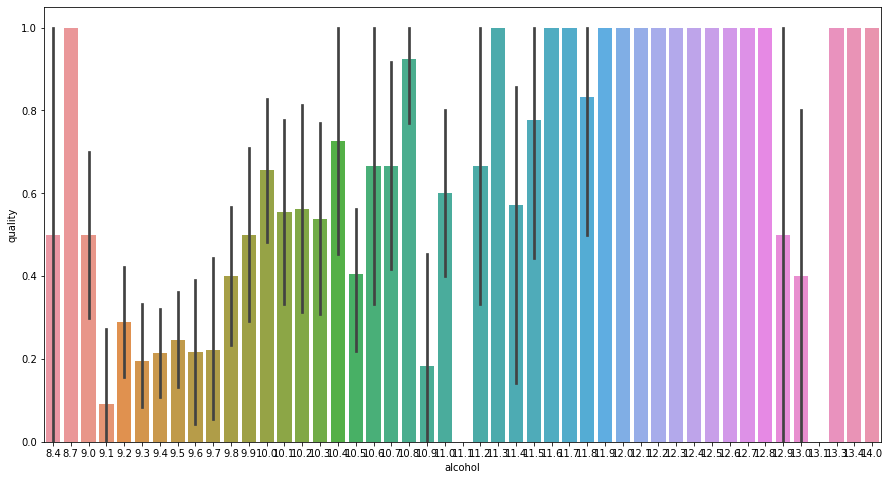

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'alcohol', y = 'quality', data = ds) #checking the relation between alcohol amount and the quality of wine

approximately , the more the wine is alcoholic, the more the quality improves

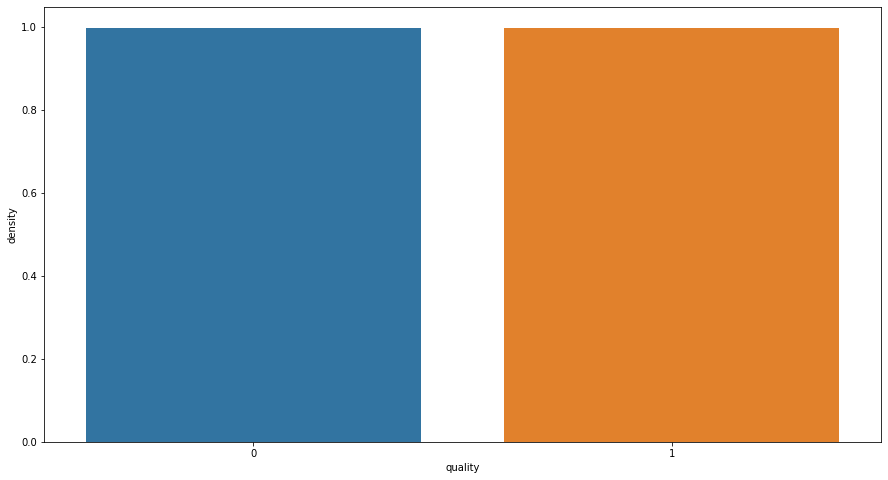

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'density', data = ds) #we want to see the influence of density on the quality

density has no influence on the quality of the wine

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


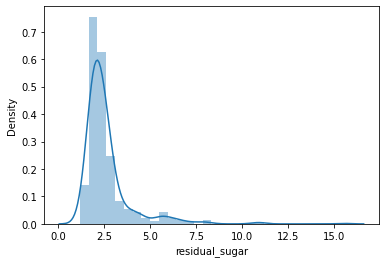

In [ ]:
sns.distplot(ds["residual_sugar"], bins= 30)
plt.show() #we want to see how much every dosage is used

the residual sugar is taking values in a very small interval
we can say that there's a commun dosage used in making wines..

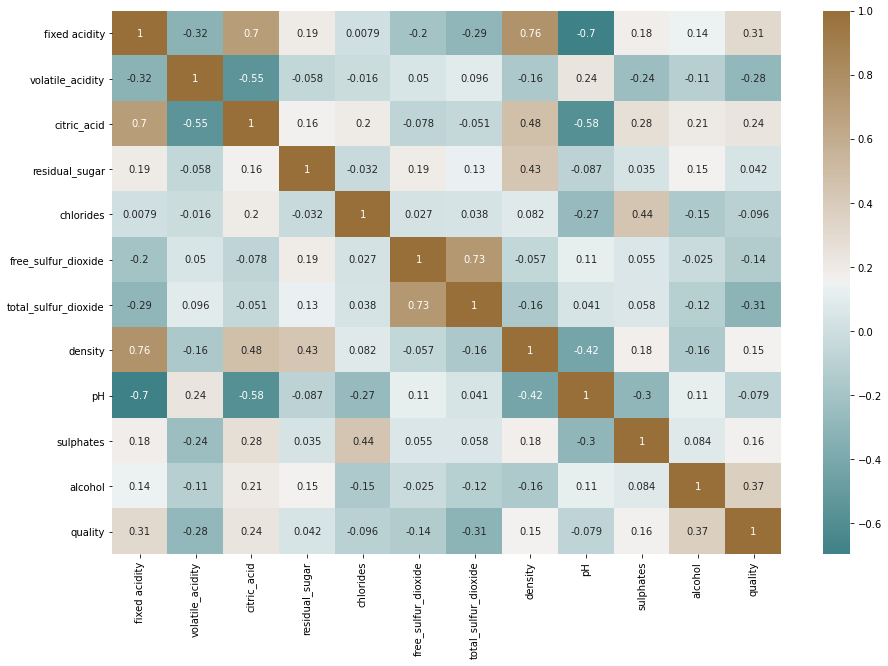

In [ ]:
corr = ds.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 50, as_cmap=True))
#here we see the relation between all our inputs

# Modeling

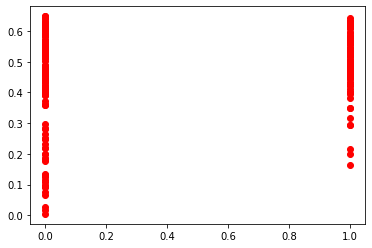

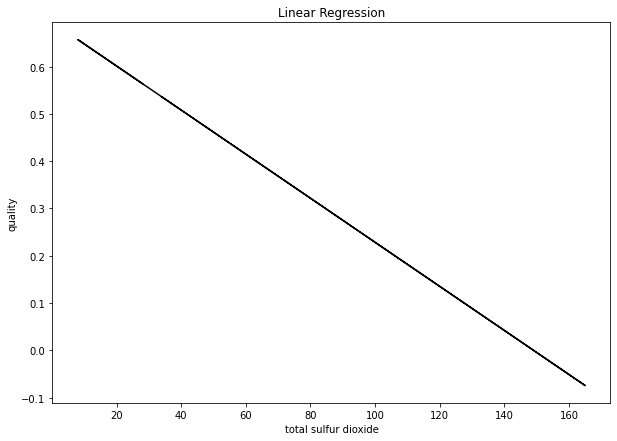

R squared 0.08700614802212525


In [ ]:
x=ds['total_sulfur_dioxide'].values.reshape(-1,1) #reshaping the array
y=ds['quality'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40) #splitting
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
plt.scatter(y_test,predicted,color='r') 
plt.figure(figsize=(10,7))
plt.ylabel('quality')
plt.xlabel('total sulfur dioxide')
plt.title('Linear Regression')
plt.plot(x,model.predict(x),color='k')
plt.show() #here we did a linear regression between quality and total sulfur dioxide
print("R squared", metrics.r2_score(y_test,predicted))

negative correlation between total sulfur dioxide and quality: the quality decreases when the amounts of total sulfur dioxide increase

as we saw in the description, the large amounts of SO2 (over 50 mg/L) makes it easily detectible and it will swallow the other savors, which decreases the quality.

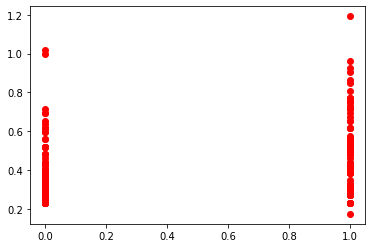

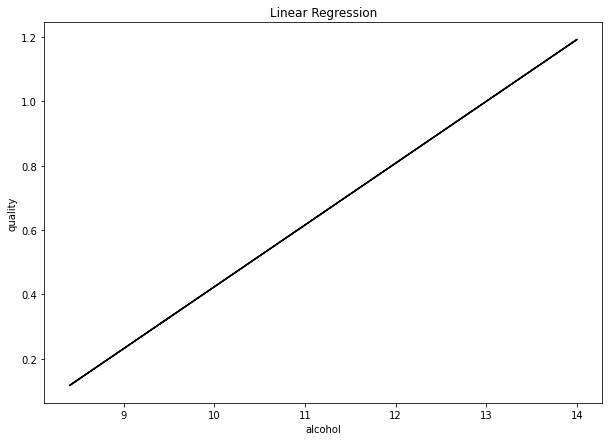

R squared 0.09714883971698463


In [ ]:
x=ds['alcohol'].values.reshape(-1,1) #reshaping the array
y=ds['quality'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40) #splitting
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
plt.scatter(y_test,predicted,color='r') 
plt.figure(figsize=(10,7))
plt.ylabel('quality')
plt.xlabel('alcohol')
plt.title('Linear Regression')
plt.plot(x,model.predict(x),color='k')
plt.show() #here we did a linear regression between quality and total alcohol
print("R squared", metrics.r2_score(y_test,predicted))

posititive correlation between alcohol and quality

that confirms what we have seen with the barplot visualization we did with alcohol & quality.

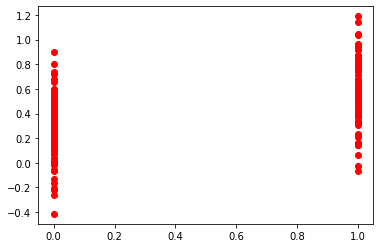

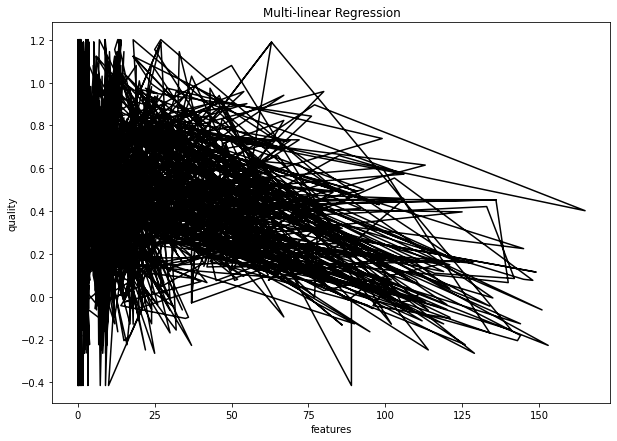

R squared 0.21250937101593148


In [ ]:
x=ds.drop(['quality'], axis=1).values #reshaping the array
y=ds['quality'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40) #splitting
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
plt.scatter(y_test,predicted,color='r') 
plt.figure(figsize=(10,7))
plt.ylabel('quality')
plt.xlabel('features')
plt.title('Multi-linear Regression')
plt.plot(x,model.predict(x),color='k')
plt.show() #here we did a milti linear regression between the features and the quality
print("R squared", metrics.r2_score(y_test,predicted))

We can really conlude something from that

let's try the decision tree classifier

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
result_dtree=cross_val_score(dtree,x_train,y_train,cv=10,scoring='accuracy')
print('DT depth :', dtree.get_depth()) #getting the depth of the decision tree
print("Score:{}".format(accuracy_score(y_pred,y_test))) #testing the accuracy of the model
print('cross validated score:',round(result_dtree.mean()*100,2)) #testing the performance of the decision tree

DT depth : 13
Score:0.6978021978021978
cross validated score: 75.95


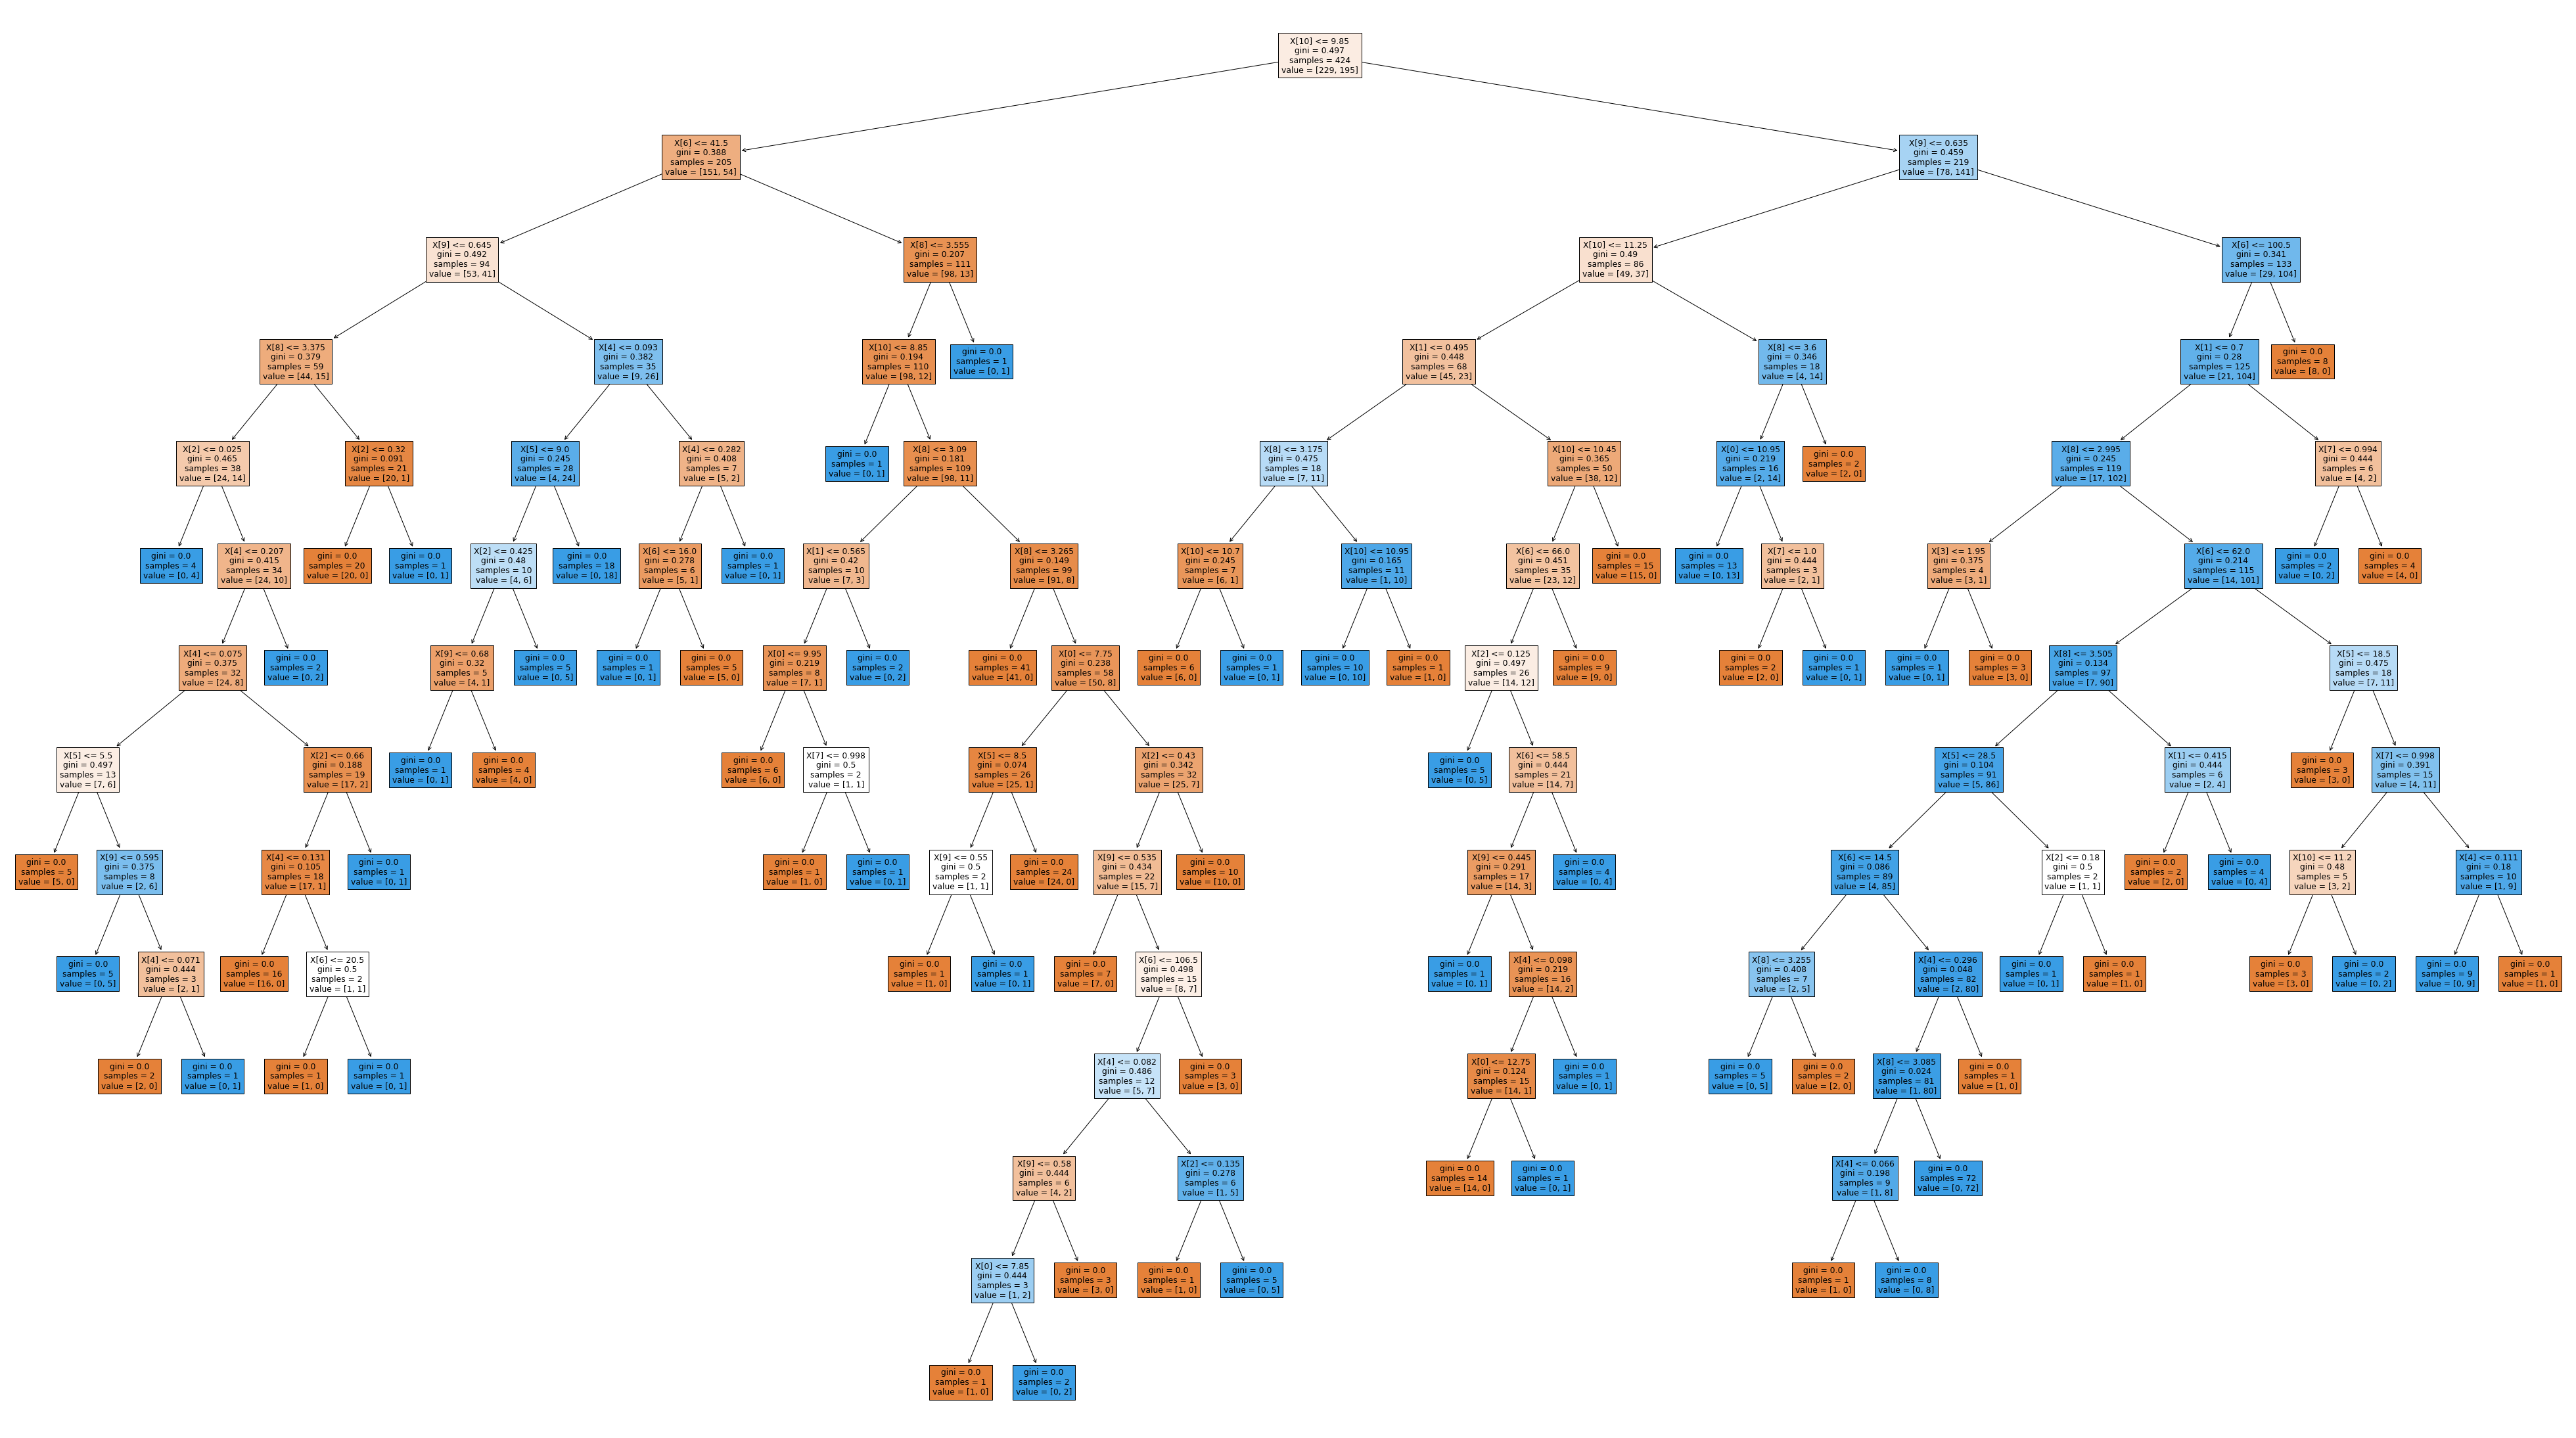

In [ ]:
fig = plt.figure(figsize=(70,40))
_ = tree.plot_tree(dtree.fit(x_train,y_train),filled=True) #plottign the classification

In [ ]:
rfc = RandomForestClassifier(criterion='gini', n_estimators=200, min_samples_split=4,min_samples_leaf=1,  max_features='auto', random_state=1)
result_rm=cross_val_score(rfc,x_train,y_train,cv=10,scoring='accuracy')
print('cross validated score:',round(result_rm.mean()*100,2)) #testing the performance of RFC 

cross validated score: 81.58


We had more precision when we used the RTF